In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from scipy.stats import chi2_contingency

# Index

1. Exploratory Data Analysis

- 1.1 Data intepretation (I)

- 1.2 Data intepretation (II)

- 1.3 Data processing

> 1.3.1 Missing values amount

> 1.3.2 Missing values distribution

> 1.3.3 Handling missing values in categorical features

> 1.3.3.1 Labelling missing values

> 1.3.4 Handling missing values in numerical features

> 1.3.4.1 Median imputation

> 1.3.5 Dataset before (df) and after (df2) modifications comparation - Numerical features

> 1.3.6 Handling missing values in numerical features (II)

> 1.3.6.1 Iterative imputation

> 1.3.7 Dataset before (df) and after (df3) modifications comparation - Numerical features (II)

- 1.4 Statistics Analysis (I)

> 1.4.1 Correlation Overview

> 1.4.2 Correlation - JobSatisfaction

> 1.4.2.2 Correlation - JobSatisfaction - Low

> 1.4.2.2 Correlation - JobSatisfaction - High

> 1.4.3 Correlation - Performance Rating

> 1.4.4 Correlation - Attrition Yes

> 1.4.5 Correlation - Environment Satisfaction

> 1.4.5.1 Correlation - Environment Satisfaction - Low

> 1.4.5.2 Correlation - Environment Satisfaction - High

> 1.4.6 Correlation - Distance From Home

> 1.4.6.1 Correlation - Distance From Home - Near

> 1.4.6.1 Correlation - Distance From Home - Far

> 1.4.7 Correlation - Years With Current Manager

- 1.5 Statistics Analysis (II)

> 1.5.1 T-test

> 1.5.1.1 T-test | Job Satisfaction - Gender

> 1.5.1.2 T-test | Age - Attrition

> 1.5.1.3 T-test | DistanceFromHome - Attrition

> 1.5.1.4 T-test | JobSatisfaction_Class - DistanceFromHome

> 1.5.2 Chi-squared

> 1.5.2.1 Chi-squared | Job Satisfaction_Class - Gender

> 1.5.2.2 Chi-squared | DistanceFromHome_Class - JobSatisfaction_Class

## 1. Exploratory Data Analysis

- 1.1 Data intepretation (I)

How many categorical and numerical columns we have?

In [2]:
df=pd.read_csv("Employee_Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

- Conclusion

As we can see:
    We have 1470 entries in total and 147 with missing values (1470-1323).
    We have 9 categorical columns and 26 numerical ones. Our datatypes are float and objects.

Columns to perform the study based on are "JobSatisfaction" and "PerformanceRating"

Entries with null values

In [3]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [4]:
missing_percentage = df.isnull().mean() * 100

missing_percentage

Age                         10.0
Attrition                   10.0
BusinessTravel              10.0
DailyRate                   10.0
Department                  10.0
DistanceFromHome            10.0
Education                   10.0
EducationField              10.0
EmployeeCount               10.0
EmployeeNumber              10.0
EnvironmentSatisfaction     10.0
Gender                      10.0
HourlyRate                  10.0
JobInvolvement              10.0
JobLevel                    10.0
JobRole                     10.0
JobSatisfaction             10.0
MaritalStatus               10.0
MonthlyIncome               10.0
MonthlyRate                 10.0
NumCompaniesWorked          10.0
Over18                      10.0
OverTime                    10.0
PercentSalaryHike           10.0
PerformanceRating           10.0
RelationshipSatisfaction    10.0
StandardHours               10.0
StockOptionLevel            10.0
TotalWorkingYears           10.0
TrainingTimesLastYear       10.0
WorkLifeBa

- Conclusion

It is evident that each column has at least 147 missing values, which accounts for 10% of the data.

In [5]:
df.isnull().sum().sum()

5145

- Conclusion

Null values will not be deleted as they are scattered throughout the dataset.

- 1.2 Data intepretation (II)

In [6]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323,1323,1323.000000,1323,1323.000000,1323.000000,1323,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1065,890,NaN,824,NaN,NaN,504,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.635268,NaN,NaN,802.030050,NaN,9.091097,2.923447,NaN,0.999325,1026.679166,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,NaN,NaN,414.031025,NaN,8.177870,1.072203,NaN,0.099656,610.480802,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,NaN,NaN,86.828045,NaN,0.750112,0.770362,NaN,0.628985,1.054148,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,NaN,NaN,456.479553,NaN,2.147069,2.122706,NaN,0.931146,501.854842,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,NaN,NaN,782.958705,NaN,6.920808,3.015658,NaN,0.998949,1022.025017,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,NaN,NaN,1130.577949,NaN,13.584900,3.700560,NaN,1.067371,1533.811096,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964


In [75]:
df.nunique()

Age                         1323
Attrition                      2
BusinessTravel                 3
DailyRate                   1323
Department                     3
DistanceFromHome            1323
Education                   1323
EducationField                 6
EmployeeCount               1323
EmployeeNumber              1323
EnvironmentSatisfaction     1323
Gender                         2
HourlyRate                  1323
JobInvolvement              1323
JobLevel                    1323
JobRole                        9
JobSatisfaction             1323
MaritalStatus                  3
MonthlyIncome               1323
MonthlyRate                 1323
NumCompaniesWorked          1146
Over18                         1
OverTime                       2
PercentSalaryHike           1323
PerformanceRating           1323
RelationshipSatisfaction    1323
StandardHours               1323
StockOptionLevel             772
TotalWorkingYears           1314
TrainingTimesLastYear       1275
WorkLifeBa

In [76]:
df['Over18'].value_counts()

Y    1323
Name: Over18, dtype: int64

We have decided to remove the term 'Over18' as it is redundant with the data we have regarding the employees' age. This avoids duplication of information.

In [ ]:
df.drop('Over18', axis=1, inplace=True)

Statisitical description of numerical columns?

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


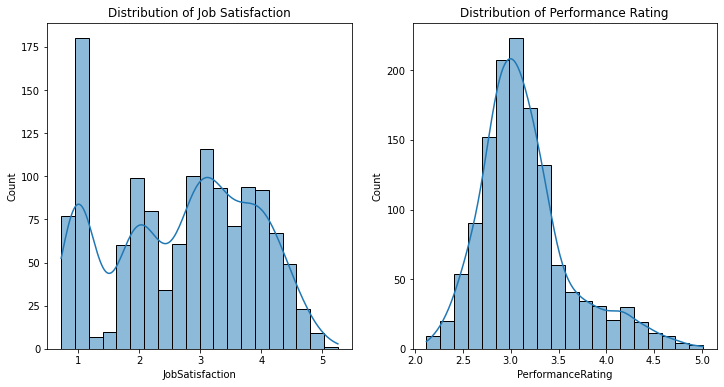

In [8]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

- Conclusion

- The mean age is approximately 35.7 years with a standard deviation of 7.7 years, indicating a moderately diverse age range.

- The average daily rate is approximately £801.45, with a wide range (standard deviation: £428.64).

- On average, employees live 8.06 km away from work, with considerable variation in this distance (standard deviation: 8.49 km).

- The average education level is 2.7 on a scale of 1-5, indicating that most employees have at least some college education.

- The average hourly rate is £64.29 with a standard deviation of £19.5.

- The average job level is 1.85, indicating that most employees hold lower to mid-level positions.

-  Employees have an average of 9.7 years of total work experience.

-  The average length of employment at the company is 5.7 years, but this varies significantly (standard deviation: 5.03 years).

-  The range of job satisfaction levels among employees is diverse, with some being very dissatisfied and others very satisfied.

-  Performance ratings demonstrate less variability than job satisfaction, with the majority of employees clustered around the average rating.

- Note

Notice that the performance rating of employees follows a normal distribution where most of the answers are concentrated between a 2.5 and 3.5, indicating that the most common is a regular performance. However, the distribution of Job Satisfaction does not follow a normal distribution but is a wider scattered, indicating that the job satisfaction in the of employees in the company is very different amount each employee.

Statisitical description of categorical columns?

In [9]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


In [10]:
df['BusinessTravel'].value_counts()

Travel_Rarely        890
Travel_Frequently    279
Non-Travel           154
Name: BusinessTravel, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      783
Female    540
Name: Gender, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

Married     596
Single      429
Divorced    298
Name: MaritalStatus, dtype: int64

In [13]:
df['EducationField'].value_counts()

Life Sciences       504
Medical             397
Marketing           149
Technical Degree    141
Other                83
Human Resources      49
Name: EducationField, dtype: int64

In [14]:
df['OverTime'].value_counts()

No     929
Yes    394
Name: OverTime, dtype: int64

In [15]:
df['JobRole'].value_counts()

Sales Executive              281
Research Scientist           257
Laboratory Technician        229
Manufacturing Director       122
Healthcare Representative    118
Manager                      101
Research Director             80
Sales Representative          75
Human Resources               60
Name: JobRole, dtype: int64

In [17]:
df['Attrition'].value_counts()

No     1065
Yes     258
Name: Attrition, dtype: int64

In [18]:
df['Department'].value_counts()

Research & Development    824
Sales                     393
Human Resources           106
Name: Department, dtype: int64

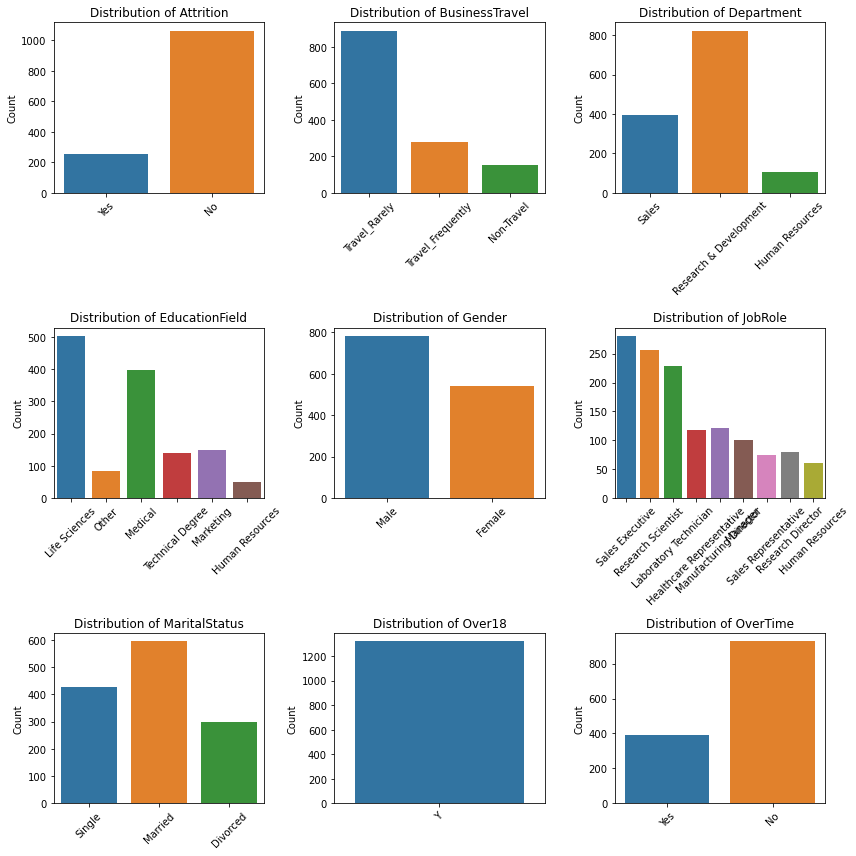

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Note

It is important to note that NaN values are not represented when using .value_counts() or plotting data. Therefore, they must be labelled and processed into a numerical form for further analysis.

In [20]:
df_cat_columns = df[categorical_columns].fillna('Missing')

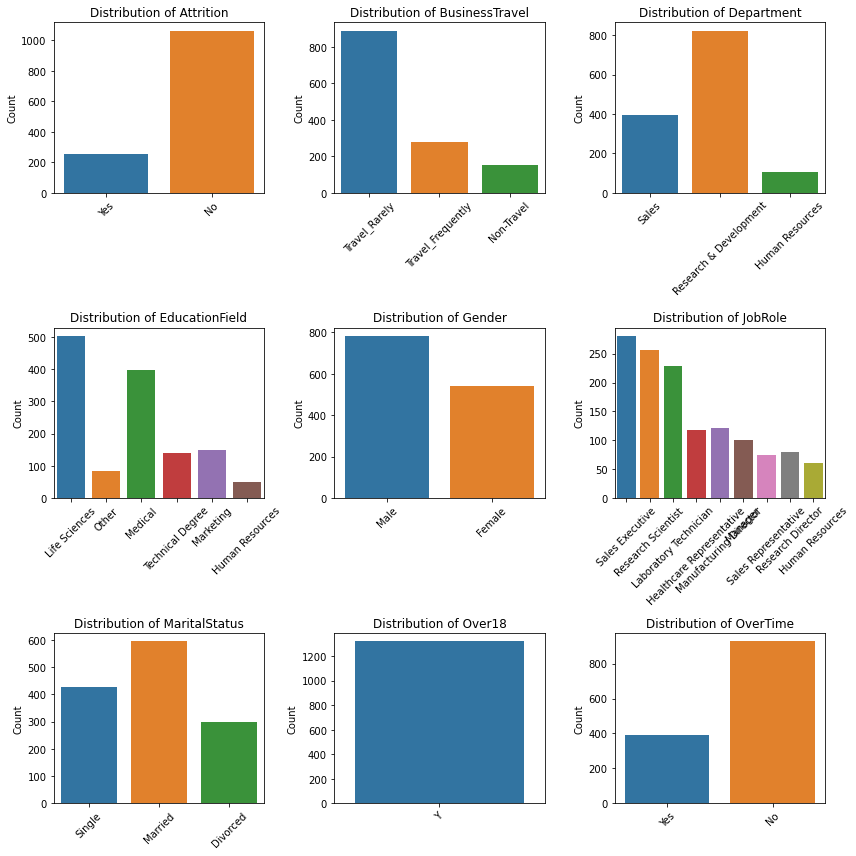

In [21]:
categorical_columns = df_cat_columns.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The profile of the average employee is the next one:

In [22]:
most_common_values = df[categorical_columns].mode().iloc[0]
most_common_values

Attrition                             No
BusinessTravel             Travel_Rarely
Department        Research & Development
EducationField             Life Sciences
Gender                              Male
JobRole                  Sales Executive
MaritalStatus                    Married
Over18                                 Y
OverTime                              No
Name: 0, dtype: object

- 1.3 Data processing

> 1.3.1 Missing values amount

The initial inquiry is whether our NaN values are in float and np.nan format or in string format as 'nan'.
Pandas only identifies np.nan as null values in numeric arrays, None or NaN in object arrays, and NaT in datatimelike. Any null value in string format is not recognised by pandas as a null value.

In [23]:
for column in df.columns:
    # Checking if there are NaN values in the column
    if df[column].isnull().any():
        # Extract the first non-null value for type comparison
        nan_value = df[column][df[column].isnull()].iloc[0]

        # Check the type of the NaN value
        if isinstance(nan_value, float) and np.isnan(nan_value):
            print(f"Column '{column}': NaN values are of type float (numpy.nan)")
        else:
            print(f"Column '{column}': NaN values are not numpy.nan")

Column 'Age': NaN values are of type float (numpy.nan)
Column 'Attrition': NaN values are of type float (numpy.nan)
Column 'BusinessTravel': NaN values are of type float (numpy.nan)
Column 'DailyRate': NaN values are of type float (numpy.nan)
Column 'Department': NaN values are of type float (numpy.nan)
Column 'DistanceFromHome': NaN values are of type float (numpy.nan)
Column 'Education': NaN values are of type float (numpy.nan)
Column 'EducationField': NaN values are of type float (numpy.nan)
Column 'EmployeeCount': NaN values are of type float (numpy.nan)
Column 'EmployeeNumber': NaN values are of type float (numpy.nan)
Column 'EnvironmentSatisfaction': NaN values are of type float (numpy.nan)
Column 'Gender': NaN values are of type float (numpy.nan)
Column 'HourlyRate': NaN values are of type float (numpy.nan)
Column 'JobInvolvement': NaN values are of type float (numpy.nan)
Column 'JobLevel': NaN values are of type float (numpy.nan)
Column 'JobRole': NaN values are of type float (

- Note

The dataset contains NaN values, which are identified correctly by the .isnull function as they are of type numpy.nan and float.

> 1.3.2 Missing values distribution

The next question to answer is whether the null values follow a pattern or are randomly distributed.

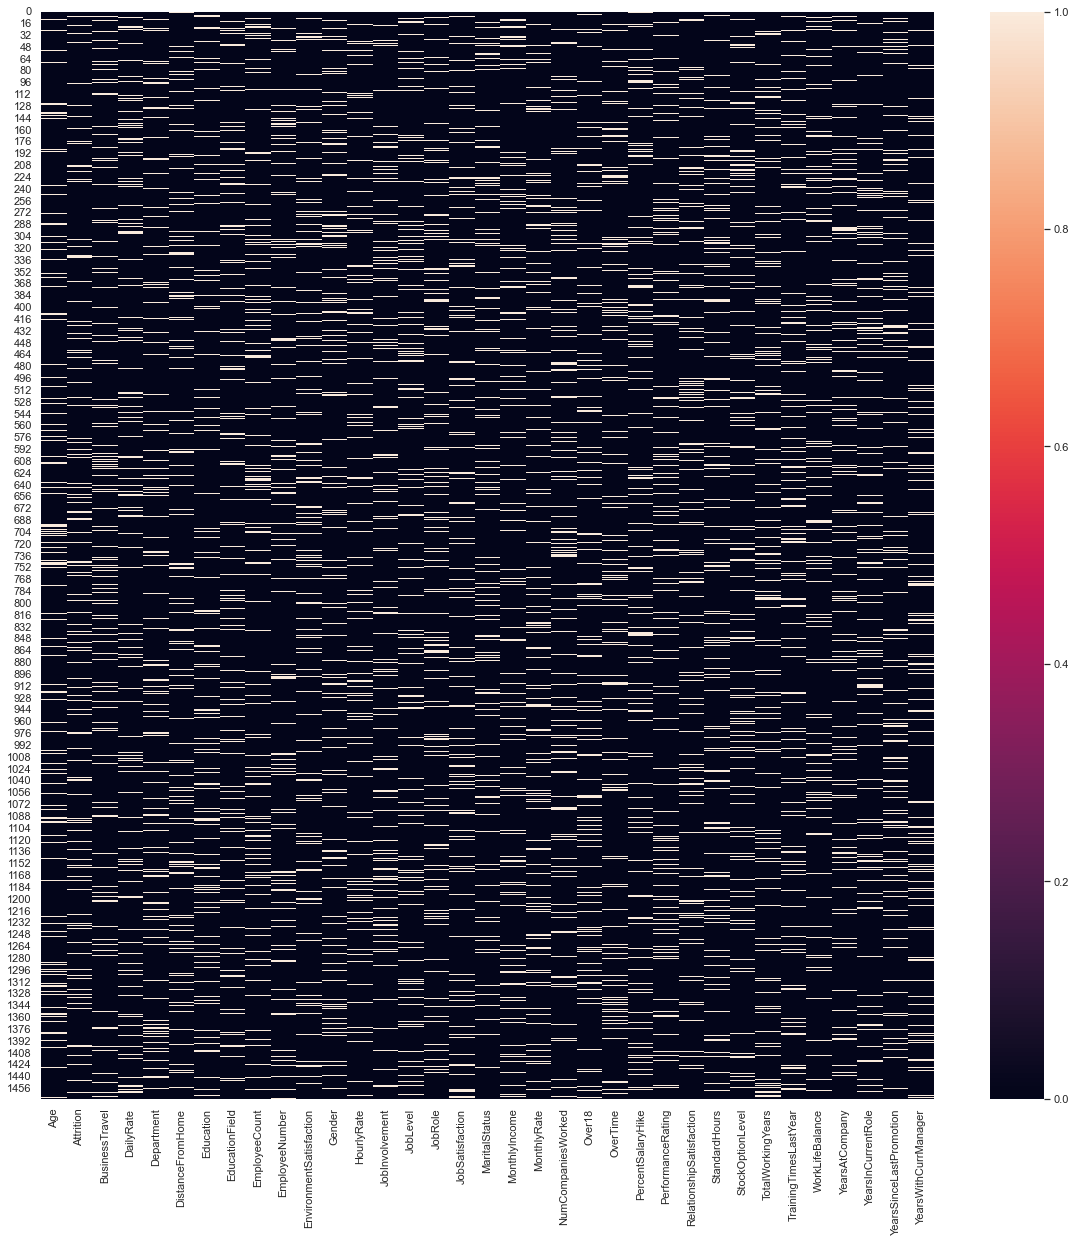

In [24]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df.isnull())
plt.show(plot)

- Conclusion

As we can see in the previous visualization the null values in our dataset are randomly distributed.

Once we have confirmed the amount of null values we have, and wheter or not they are randomly distributed, we have decided to perform One-Hot Encoding for those features categorical nominal and labeling as a separate category the nan values presents in categorical features.

> 1.3.3 Handling missing values in categorical features

> 1.3.3.1 Labelling missing values

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
df3 = df[categorical_columns].fillna('Missing')

> 1.3.4 Handling missing values in numerical features

In [26]:
missing_percentage = df3.select_dtypes(include=['float64']).isnull().mean() * 100

missing_percentage

Series([], dtype: float64)

- Conclusion

The missingness is random and the amount of missing values is low, so we are deciding to start perform a median imputation using the SimpleImputer class from sklearn.impute:
- In our dataset we don't have to worry about outliers since all the answers are given from a set of questions.
- When deciding how to handle missing values for numerical entries, SimpleImputer was chosen because it applies the same imputation strategy across all columns, ensuring consistency in how missing values are handled and reducing the likelihood of bias. 

> 1.3.4.1 Median imputation

In [27]:
imputer = SimpleImputer(strategy='median')

numerical_columns = df.select_dtypes(include=['float64']).columns

df2[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   object 
 1   BusinessTravel            1470 non-null   object 
 2   Department                1470 non-null   object 
 3   EducationField            1470 non-null   object 
 4   Gender                    1470 non-null   object 
 5   JobRole                   1470 non-null   object 
 6   MaritalStatus             1470 non-null   object 
 7   Over18                    1470 non-null   object 
 8   OverTime                  1470 non-null   object 
 9   Age                       1470 non-null   float64
 10  DailyRate                 1470 non-null   float64
 11  DistanceFromHome          1470 non-null   float64
 12  Education                 1470 non-null   float64
 13  EmployeeCount             1470 non-null   float64
 14  Employee

> 1.3.5 Dataset before (df) and after (df2) modifications comparation - Numerical features

- Statistical comparison

Dataset before handling null values

In [29]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


Dataset after handling null values

In [30]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.466937,800.122915,8.874068,2.932668,0.999288,1026.213751,2.742530,65.576399,2.754639,2.046058,...,2.737511,80.252322,0.824646,11.214211,2.799674,2.776524,6.782477,4.106915,2.041353,3.999849
std,9.388288,392.811161,7.785207,1.017519,0.094539,579.132721,1.072754,20.368309,0.727090,1.069771,...,1.059892,7.610629,0.819292,7.687510,1.261315,0.723850,5.754185,3.490944,3.076970,3.427782
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,30.357410,502.681603,2.265377,2.200839,0.938491,539.350448,1.956071,49.027545,2.260665,1.065687,...,1.967961,75.457008,0.000000,6.338285,2.012541,2.288428,2.976554,1.895985,0.000000,1.812728
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,41.714666,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.310216,...,3.475659,84.947190,1.057531,14.198518,3.262780,3.169524,8.797517,6.756694,2.121911,6.739316
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


- Conclusion

As we have decided to handle null values by filling them with the mean, both datasets maintain almost identical descriptive statistics values, with minimal variation in feature values.

- Visual inspection

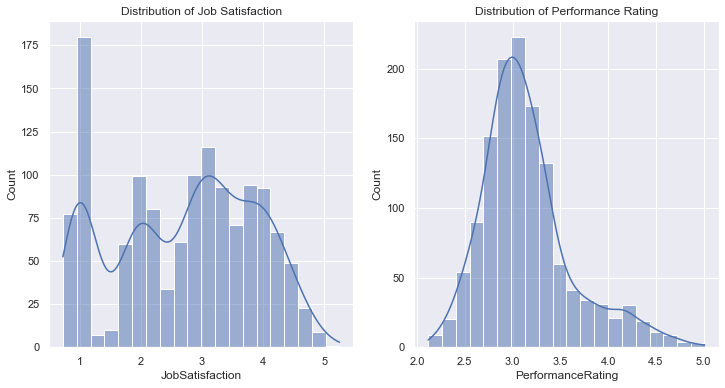

In [31]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

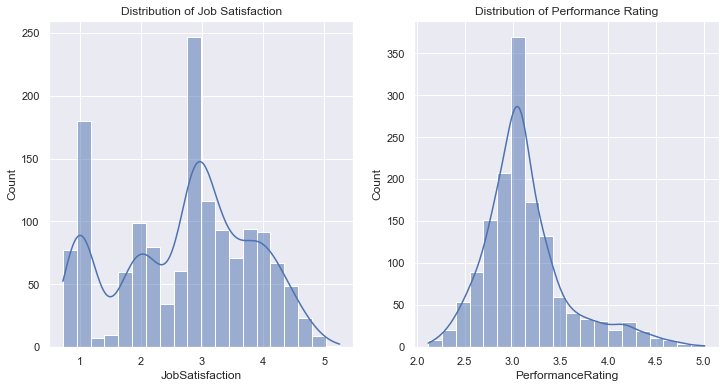

In [32]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df2['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df2['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

- Conclusion

This approach of using the median to fill in the null values is usually a good strategy when we are working with a collection of data from a survey because this type of data set usually follows a normal distribution where most of the answers given are common to all participants.
However, although this is true when analysing the performance ratings of all employees in the company, it is not the same when analysing the distribution of responses about job satisfaction, where there seems to be a wider and more dispersed opinion.

As we can see, using the median to fill in the null values is effective when working with data that follow a normal distribution, but since the purpose of the project is to study how to increase performance rating but also how to increase job satisfaction without affecting the scattered nature of this second is quite important and so it was decided to proceed with a more advanced way of filling in the null values.

> 1.3.6 Handling missing values in numerical features (II)

To maintain the original spread and distribution of the data, we are considering using a more sophisticated imputation method that takes into account the data's variability. One such method is Multiple Imputation.

Multiple Imputation is a statistical technique that fills in missing values multiple times to create several complete datasets. The final imputation is obtained by averaging these datasets. This method is beneficial because it preserves the natural variance in the data.

In [33]:
df3 = df.copy()

# Selecting categorical columns
categorical_columns = df3.select_dtypes(include=['object']).columns

# Fill missing values with 'Missing' and apply one-hot encoding in one step
for col in categorical_columns:
    # Filling missing values
    df3[col] = df3[col].fillna('Missing')
    
    # Applying one-hot encoding
    df3 = pd.concat([df3, pd.get_dummies(df3[col], prefix=col)], axis=1)
    
    # Dropping the original column
    df3.drop(col, axis=1, inplace=True)

> 1.3.6.1 Iterative imputation

In [34]:
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

# Selecting numerical columns from df3
numerical_columns = df3.select_dtypes(include=['float64']).columns

# Applying the imputer to the numerical columns in df3
df3[numerical_columns] = iterative_imputer.fit_transform(df3[numerical_columns])

C:\Users\eduma\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


The Early Stopping Criterion is used by the imputer to check if it has reached convergence before the maximum number of iterations (max_iter). If the change in imputed values between iterations is below a certain threshold, the imputer stops iterating and considers it has converged.

 The warning message indicates that the imputer did not reach this convergence criterion within the specified number of iterations (10 in this case). Essentially, the imputed values were still changing significantly at iteration 10.

In [35]:
iterative_imputer = IterativeImputer(max_iter=20, random_state=0)

# Selecting numerical columns from df3
numerical_columns = df3.select_dtypes(include=['float64']).columns

# Applying the imputer to the numerical columns in df3
df3[numerical_columns] = iterative_imputer.fit_transform(df3[numerical_columns])

> 1.3.7 Dataset before (df) and after (df3) modifications comparation - Numerical features (II)

- Statistical comparison

Dataset before handling null values

In [36]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


Dataset after handling null values

In [37]:
df3.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Missing,MaritalStatus_Single,Over18_Missing,Over18_Y,OverTime_Missing,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.744833,802.048479,9.093930,2.925734,0.999297,1026.681890,2.726172,65.652362,2.742740,2.058599,...,0.051020,0.202721,0.405442,0.100000,0.291837,0.100000,0.900000,0.100000,0.631973,0.268027
std,9.602016,392.790397,7.758481,1.019301,0.094578,579.135834,1.071830,20.367755,0.726376,1.115096,...,0.220114,0.402163,0.491144,0.300102,0.454762,0.300102,0.300102,0.300102,0.482433,0.443083
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.219032,502.681603,2.265377,2.200839,0.938491,539.350448,1.956071,49.027545,2.260665,1.058998,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,35.146708,800.009635,7.871631,2.986715,0.998640,1026.645546,2.786851,65.520006,2.797044,1.922125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,42.409734,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.605966,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Conclusion

Multiple Imputation is a statistical technique that uses the entire set of observed data to estimate the distributions of missing values while preserving the descriptive characteristics of the data. This approach ensures that the imputed values are consistent with the original data distribution, maintaining similar means, standard deviations, and quartiles. 

- Visual inspection

Dataset before handling null values

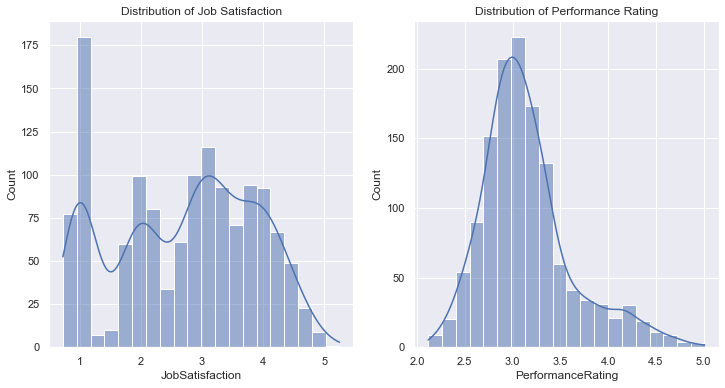

In [38]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

Dataset after handling null values

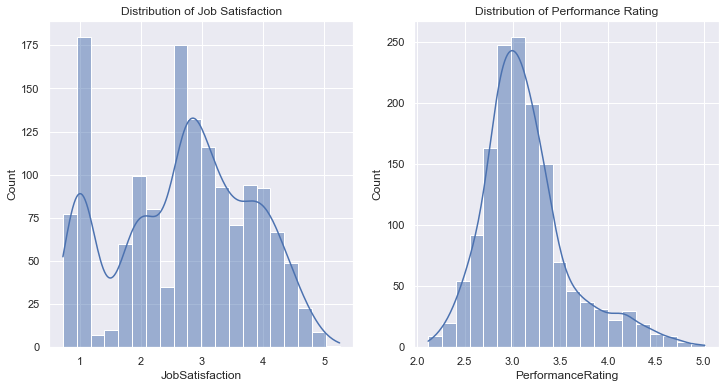

In [39]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df3['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df3['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

- Conclusion

As can be seen, using Multiple Imputation as a statistical technique to fill null values maintains the distribution and spread of the data. 
Therefore, we have decided to move forward with this technique for the numerical features and null values in our dataset combinded with labelling the null values for the categorical features previoulsly done.

In [40]:
df3

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Missing,MaritalStatus_Single,Over18_Missing,Over18_Y,OverTime_Missing,OverTime_No,OverTime_Yes
0,41.920786,990.110009,1.016716,1.770313,1.033298,1.054148,2.146294,93.827486,3.426960,2.464492,...,0,0,0,0,1,0,1,0,0,1
1,51.589037,276.776030,9.019815,1.035333,0.944859,2.107031,3.470803,52.304157,1.813458,1.788697,...,0,0,1,0,0,0,1,0,1,0
2,33.131540,1204.158501,2.198662,2.118801,0.810809,4.008125,3.979420,87.271332,1.877226,0.833488,...,0,0,0,0,1,0,1,0,0,1
3,34.707073,1352.752432,2.937851,3.670674,0.822976,4.587269,3.734705,56.378982,2.932646,1.095372,...,0,0,1,0,0,1,0,0,0,1
4,24.790188,485.053333,1.988953,1.120496,0.981683,7.228740,1.079412,40.433887,3.117739,0.937746,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,914.061807,21.647903,3.021253,0.950166,2142.083554,3.171444,65.564948,3.372679,1.993840,...,0,0,1,0,0,0,1,0,1,0
1466,34.957777,574.675152,6.027683,1.122961,1.064563,2221.578902,4.284094,39.842324,2.038727,2.532482,...,0,0,1,0,0,0,1,0,1,0
1467,26.884296,151.506083,9.107431,3.478895,0.960908,1026.749755,2.152282,91.603642,4.394863,1.964613,...,0,0,1,0,0,0,1,0,0,1
1468,39.449636,995.977086,2.094496,2.956093,0.873312,2086.654641,4.095580,59.110216,2.019760,1.925025,...,0,0,1,0,0,1,0,0,1,0


- 1.4 Statistics Analysis (I)

> 1.4.1 Correlation Overview

The first analysis that has been decided to be carried out is a correlation analysis to explore the relationships between numerical variables.
The purpose is to determine if there is any correlation between job satisfaction and performance rating with any of the other questions answered that could explain why some employees seem to be more satisfied and perform better than others.

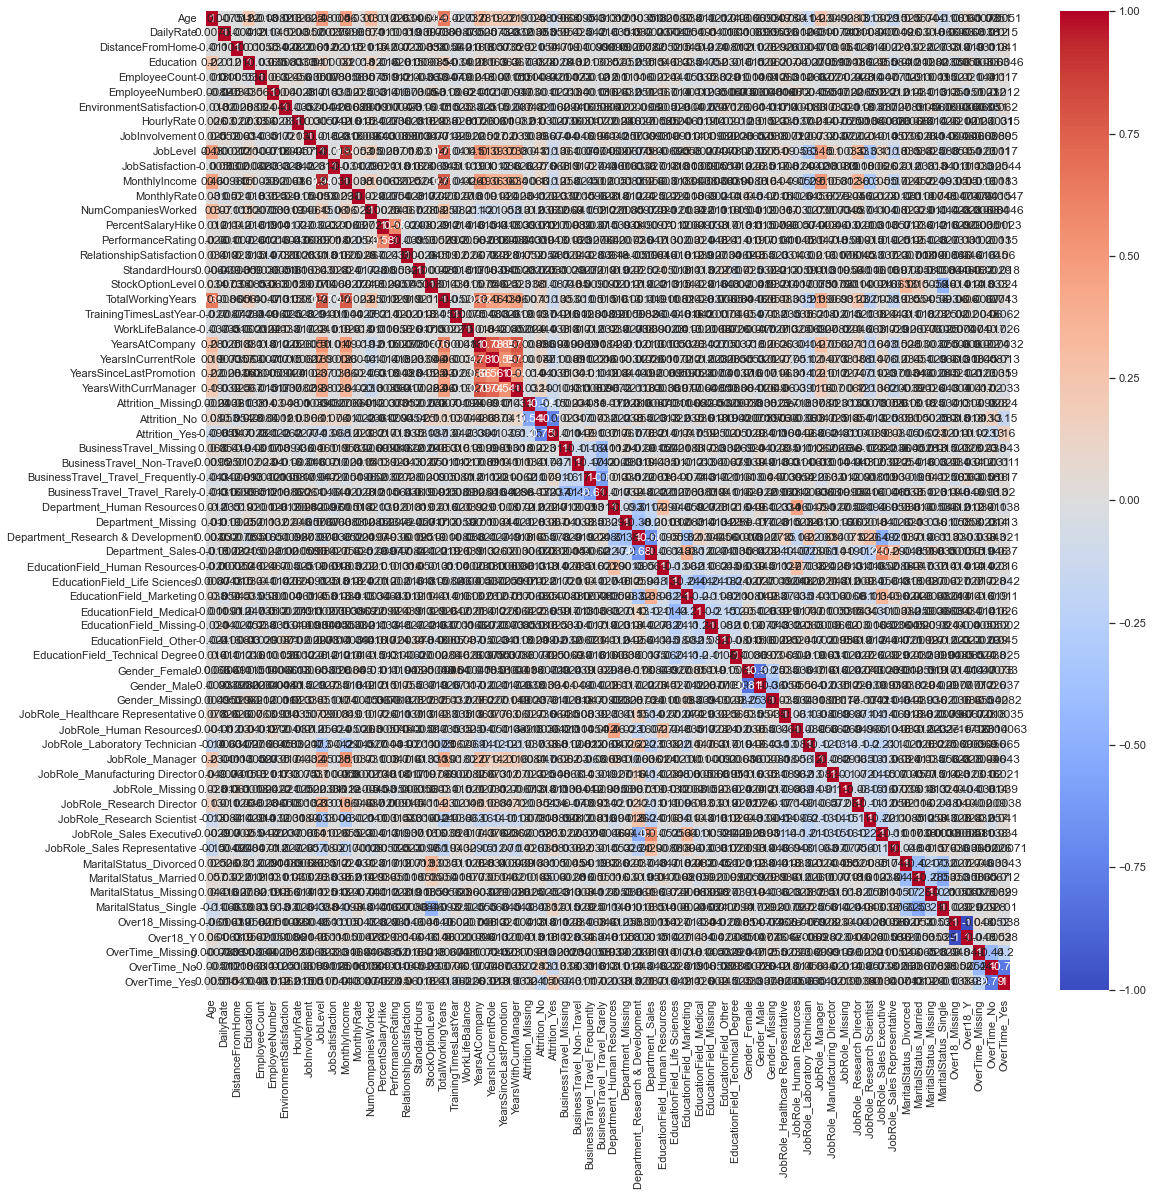

In [41]:
plt.figure(figsize = (18,18))

sns.heatmap(df3.corr(),annot= True, cmap = "coolwarm")

plt.show()

Upon initial review, the correlation encountered does not provide any insights to our questions. How can employee satisfaction and performance be improved?

> 1.4.2 Correlation - JobSatisfaction

In [74]:
Q1 = df['JobSatisfaction'].quantile(0.25)
Q3 = df['JobSatisfaction'].quantile(0.75)

print(df['JobSatisfaction'].min())
print(Q1)
print(Q3)
print(df['JobSatisfaction'].max())

0.7241919311254488
1.846039369399311
3.676663495473799
5.251277246364281


In [43]:
# Defining thresholds.
thresholds = [0.72, 1.9, 3.68, 5.26]

# Creating bins using the defined thresholds
df3['JobSatisfaction_Class'] = pd.cut(df3['JobSatisfaction'], bins=thresholds, labels=['Low', 'Medium', 'High'], include_lowest=True)

df3.drop('JobSatisfaction', axis=1, inplace=True)

df3 = pd.get_dummies(df3, columns=['JobSatisfaction_Class'])

> 1.4.2.1 Correlation - JobSatisfaction - Low

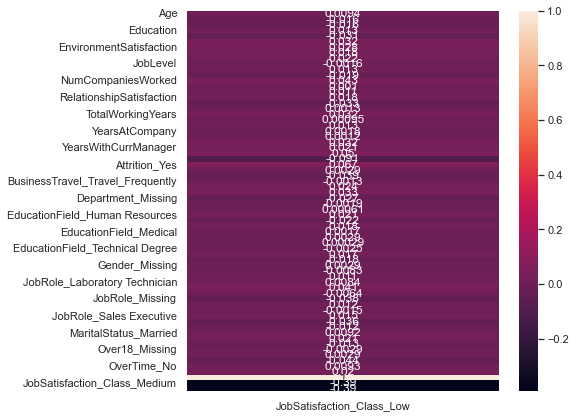

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["JobSatisfaction_Class_Low"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between a low job satisfaction and the other survey questions. 

> 1.4.2.2 Correlation - JobSatisfaction - High

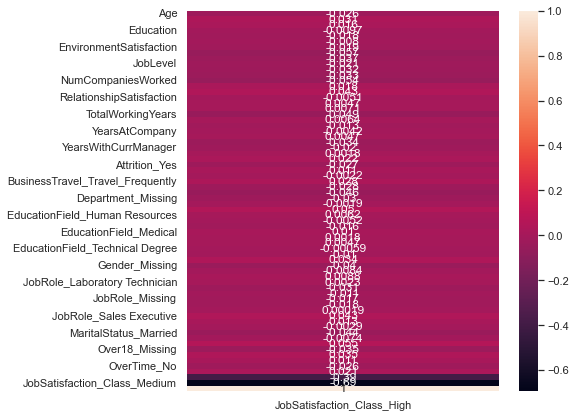

In [45]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["JobSatisfaction_Class_High"]], annot=True)
plt.show()

- Conclusion:

There appears to be no significant correlation between high job satisfaction and the other survey questions, except for marital status. Apparently, single employees seem to be slightly happier.

> 1.4.3 Correlation - Performance Rating

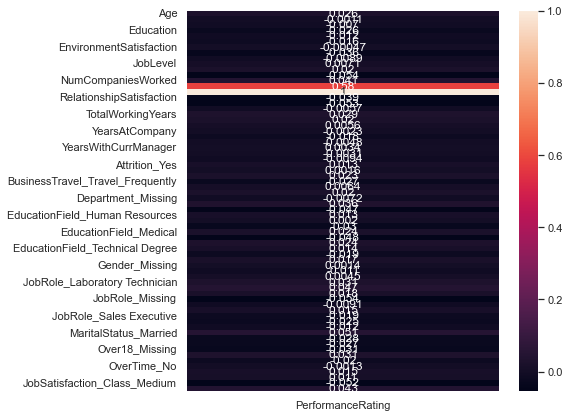

In [46]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["PerformanceRating"]], annot=True)
plt.show()

- Conclusion

There is no significant correlation between job satisfaction and the other questions, except for percent salary hike. This means that salary increases are determined based on the reasons for the performance rating.

> 1.4.4 Correlation - Attrition Yes

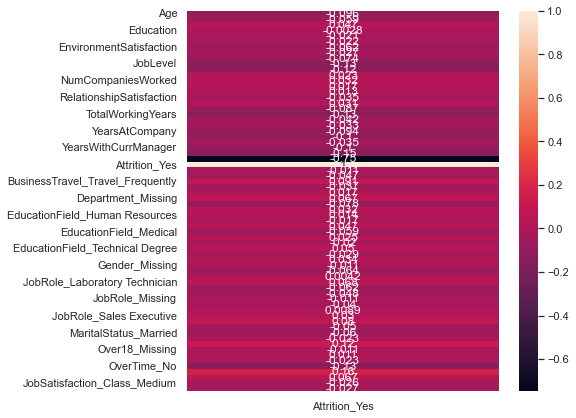

In [47]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["Attrition_Yes"]], annot=True)
plt.show()

- Conclusion

There is no significant correlation between leaving the company and the other questions. However, there is a small correlation between whether or not employees do extra hours and their job satisfaction. This suggests that job satisfaction may be influenced by the requirement to work additional hours.

> 1.4.5 Correlation - Environment Satisfaction

In order to analyse the environmental satisfaction, it was decided to group the answers given by the employees into 3 classes, low, medium and high satisfaction, and then to use dummies as a technique to process the resulting categorical values.

In [73]:
Q1 = df['EnvironmentSatisfaction'].quantile(0.25)
Q3 = df['EnvironmentSatisfaction'].quantile(0.75)

print(df['EnvironmentSatisfaction'].min())
print(Q1)
print(Q3)
print(df['EnvironmentSatisfaction'].max())

0.759654638536712
1.8948184777152657
3.676600029158743
5.254672463826308


In [49]:
# Defining thresholds.
thresholds = [0.74, 1.90, 3.38, 5.26]

# Creating bins using the defined thresholds
df3['EnvironmentSatisfaction_Class'] = pd.cut(df3['EnvironmentSatisfaction'], bins=thresholds, labels=['Low', 'Medium', 'High'], include_lowest=True)

df3.drop('EnvironmentSatisfaction', axis=1, inplace=True)

df3 = pd.get_dummies(df3, columns=['EnvironmentSatisfaction_Class'])

> 1.4.5.1 Correlation - Environment Satisfaction - Low

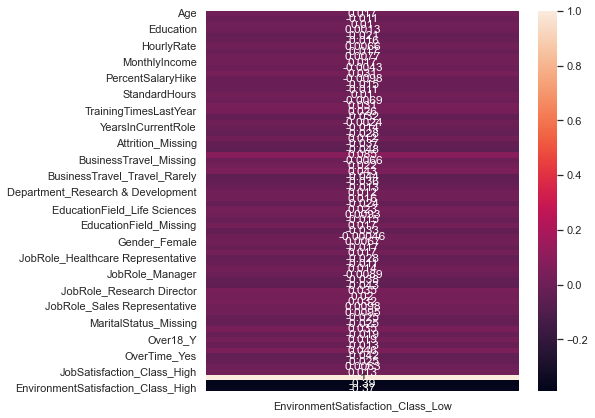

In [50]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["EnvironmentSatisfaction_Class_Low"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 1.4.5.2 Correlation - Environment Satisfaction - High

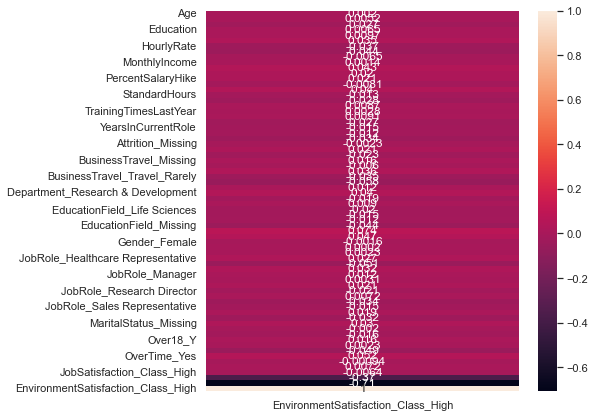

In [51]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["EnvironmentSatisfaction_Class_High"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 1.4.6 Correlation - Distance From Home

In [72]:
Q1 = df['DistanceFromHome'].quantile(0.25)
Q3 = df['DistanceFromHome'].quantile(0.75)

print(df['DistanceFromHome'].min())
print(Q1)
print(Q3)
print(df['DistanceFromHome'].max())

0.7501117306387316
2.1470694723850077
13.584900366940989
33.68442422658076


In [53]:
# Defining bins based on the min and max values
bins = [0.75, 2.15, 13.59, 33.69]  # Adjust the bin edges as needed

# Creating binned column in df3
df3['DistanceFromHome_Class'] = pd.cut(df3['DistanceFromHome'], bins=bins, labels=['Near', 'Moderate', 'Far'])

# Applying one-hot encoding to the new column in df3
df3 = pd.get_dummies(df3, columns=['DistanceFromHome_Class'])

> 1.4.6.1 Correlation - Distance From Home - Near

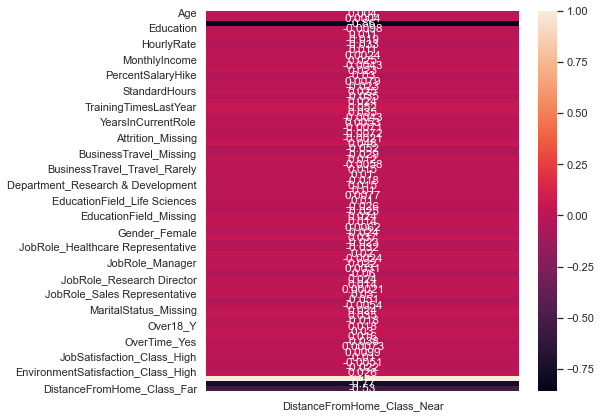

In [54]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["DistanceFromHome_Class_Near"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 1.4.6.2 Correlation - Distance From Home - Far

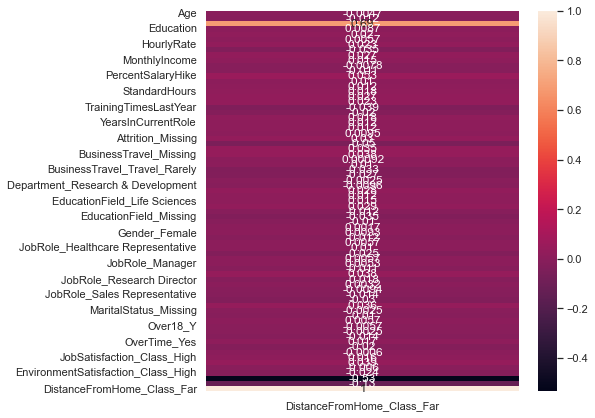

In [55]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["DistanceFromHome_Class_Far"]], annot=True)
plt.show()

- Conclusion

There seems to be a correlation between the distance from the company and the level of education, but since there is no correlation between the level of education of the employees and their satisfaction with the company and their performance, no further analysis is made in relative terms.

> 1.4.6 Correlation - Years In Current Role

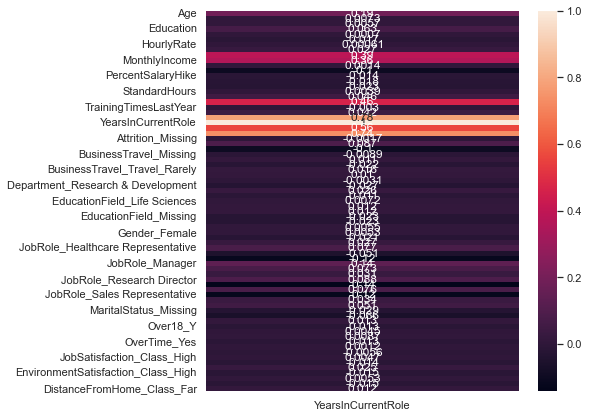

In [56]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["YearsInCurrentRole"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 1.4.7 Correlation - Years With Current Manager

In [57]:
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

print(df['YearsWithCurrManager'].min())
print(Q1)
print(Q3)
print(df['YearsWithCurrManager'].max())

0.0
1.6871774665902513
6.987963777925415
19.976002899542003


In [58]:
# Defining bins based on the min and max values
bins = [0.0, 1.6871774665902513, 6.987963777925415, 19.976002899542003]

# Creating binned column in df3
df3['YearsWithCurrManager_Class'] = pd.cut(df3['YearsWithCurrManager'], bins=bins, labels=['less_2', 'less_7', 'More_15'])

# Applying one-hot encoding to the new column in df3
df3 = pd.get_dummies(df3, columns=['YearsWithCurrManager_Class'])

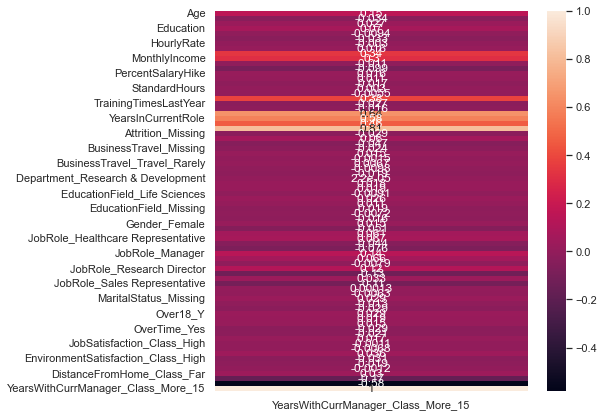

In [71]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["YearsWithCurrManager_Class_More_15"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

- Conclusion

Although correlation does not imply causation, there is no evidence of a significant correlation between the responses that would indicate conclusive reasons why employees appear to be more or less satisfied with their jobs or why their performance is better or worse.
Further analysis will therefore be undertaken to provide more information on how to improve employee performance and job satisfaction and how to prevent them from leaving the company.

- 1.5 Statistics Analysis (II)

> 1.5.1 T-test

We are using a t-test to compare the average job satisfaction between two groups, such as male and female employees.

> 1.5.1.1 T-test | Job Satisfaction - Gender

In [61]:
df2['Gender'].value_counts()

Male       783
Female     540
Missing    147
Name: Gender, dtype: int64

Hypothesis:

Null Hypothesis (H0): There is no significant difference in job satisfaction between male and female employees.

Alternative Hypothesis (H1): There is a significant difference in job satisfaction between male and female employees.

In [62]:
# Filtering data for males and females
male_satisfaction = df2[df2['Gender'] == 'Male']['JobSatisfaction']
female_satisfaction = df2[df2['Gender'] == 'Female']['JobSatisfaction']

# Performing t-test
t_stat, p_val = stats.ttest_ind(male_satisfaction, female_satisfaction)

# Printing the results
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: 1.264684455532383, P-Value: 0.2062075329069506


- Conclusion

The T-Statistic value of 1.2647 shows the difference between the means of job satisfaction of male and female employees in terms of standard error units.

The P-Value indicates the likelihood of obtaining a result as extreme as the one obtained if the null hypothesis were true. In this case, the null hypothesis (H0) states that there is no significant difference in job satisfaction between male and female employees.

Since the P-Value is 0.2062, which is higher than the typical alpha level of 0.05, we do not have sufficient evidence to reject the null hypothesis.

> 1.5.1.2 T-test | Age - Attrition

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average age of employees between the two attrition groups.

Alternative Hypothesis (H1): There is a significant difference in the average age of employees between the two attrition groups.

In [63]:
# Filtering data based on attrition
attrition_yes_age = df2[df2['Attrition'] == 'Yes']['Age']
attrition_no_age = df2[df2['Attrition'] == 'No']['Age']

# Performing t-test
t_stat_age, p_val_age = stats.ttest_ind(attrition_yes_age, attrition_no_age)

# Printing the results
print(f"T-Statistic for Age: {t_stat_age}, P-Value: {p_val_age}")

T-Statistic for Age: -3.500980120392103, P-Value: 0.0004789889446416675


- Conclusion

Given the low P-Value, we reject the null hypothesis (H0) which stated there is no significant difference in the average age of employees between the two attrition groups.

The negative T-Statistic value (-3.50098) indicates that the average age of employees who have left the company ('Yes' to attrition) is lower than that of the employees who haven't left ('No' to attrition).

The P-Value of 0.00047899 is significantly less than the common alpha level of 0.05. This low P-Value indicates that the observed difference in ages between the two groups is statistically significant.

- Possible solutions

Career Development Opportunities

Younger employees often seek opportunities for growth and learning. To retain them, implement robust career development programs, such as mentorship, training sessions, and clear pathways for advancement.

Recognition and Feedback

Regular recognition and constructive feedback can increase job satisfaction. It is important to note that younger employees often value frequent feedback and acknowledgment of their contributions.

> 1.5.1.3 T-test | DistanceFromHome - Attrition

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average distance from home of employees between the two attrition groups.

Alternative Hypothesis (H1): There is a significant difference in the average distance from home between the two attrition groups.

In [64]:
# Filtering data based on attrition
attrition_yes_distance = df2[df2['Attrition'] == 'Yes']['DistanceFromHome']
attrition_no_distance = df2[df2['Attrition'] == 'No']['DistanceFromHome']

# Performing t-test
t_stat_distance, p_val_distance = stats.ttest_ind(attrition_yes_distance, attrition_no_distance)

# Printing the results
print(f"T-Statistic for Distance: {t_stat_distance}, P-Value: {p_val_distance}")

T-Statistic for Distance: 1.8669784444931201, P-Value: 0.06212596526769459


- Conclusion

The T-Statistic value of 1.86698 is positive, indicating that employees who have left the company (Attrition = 'Yes') have a higher average distance from home than those who haven't left (Attrition = 'No').

The P-Value is marginally above 0.05, so we cannot confidently reject the null hypothesis (H0), which posits no significant difference in the average distance from home of employees between the two attrition groups.

The results indicate that although employees who left the company tend to live slightly farther away from work than those who stayed, this trend is not statistically significant. However, it is close enough to the threshold to warrant further investigation, possibly with a larger sample size or additional contextual factors taken into account.

> 1.5.1.4 T-test | JobSatisfaction_Class - DistanceFromHome

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average distance from home between employees with low job satisfaction and those with high job satisfaction.

Alternative Hypothesis (H1): This hypothesis suggests that the level of job satisfaction (low or high) does not affect how far employees live from their workplace.

In [65]:
# Defining thresholds.
thresholds = [0.72, 1.5, 3.0, 5.26]

# Creating bins using the defined thresholds
df2['JobSatisfaction_Class'] = pd.cut(df2['JobSatisfaction'], bins=thresholds, labels=['Low', 'Medium', 'High'], include_lowest=True)

# Filtering data based on attrition
JobSatisfaction_Low_DistanceHome = df2[df2['JobSatisfaction_Class'] == 'Low']['DistanceFromHome']
JobSatisfaction_High_DistanceHome = df2[df2['JobSatisfaction_Class'] == 'High']['DistanceFromHome']

# Performing t-test
t_stat_DistanceHome, p_val_DistanceHome = stats.ttest_ind(JobSatisfaction_Low_DistanceHome, JobSatisfaction_High_DistanceHome)

# Printing the results
print(f"T-Statistic for Distance: {t_stat_DistanceHome}, P-Value: {p_val_DistanceHome}")

T-Statistic for Distance: -0.7286216662821853, P-Value: 0.46642942464214454


- Conclusion

The T-Statistic value of -0.72862 indicates that employees with low job satisfaction tend to live slightly closer to work than those with high job satisfaction. 

The P-Value of 0.46643 is not statistically significant at the common alpha level of 0.05, meaning that the observed difference in average distance from home between the two groups is not significant.

This suggests that the distance an employee lives from their workplace does not significantly impact their level of job satisfaction.

> 1.5.2 Chi-squared

The chi-squared statistic measures the difference between the observed frequencies in each category and the frequencies that would be expected if there were no association between the two variables. A higher value usually indicates a stronger association.

> 1.5.2.1 Chi-squared | Job Satisfaction_Class - Gender

Hypothesis:

Null Hypothesis (H0): There is no association between gender and job satisfaction class.

Alternative Hypothesis (H1): There is an association between gender and job satisfaction class.

In [66]:
#df2.drop('JobSatisfaction', axis=1, inplace=True)
T_t_GA = df2.groupby(['Gender', 'JobSatisfaction_Class']).size().reset_index(name='Count')

T_t_GA

,Gender,JobSatisfaction_Class,Count
0,Female,Low,102
1,Female,Medium,219
2,Female,High,219
3,Male,Low,136
4,Male,Medium,312
5,Male,High,335
6,Missing,Low,27
7,Missing,Medium,68
8,Missing,High,52


In [67]:
# Create a contingency table
contingency_table = pd.crosstab(df2['Gender'], df2['JobSatisfaction_Class'])

# Perform the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-squared: {chi2}, P-Value: {p_val}")

Chi-squared: 3.4175104871859716, P-Value: 0.4905313763502147


- Conclusion

With a p-value of 0.4905, which is greater than the common alpha level of 0.05, we cannot reject the null hypothesis.
This means that, based on the data, there is no statistically significant association between gender and job satisfaction class. In other words, any observed differences in job satisfaction classes between genders are likely due to chance and not statistically significant.

> 1.5.2.2 Chi-squared | DistanceFromHome_Class - JobSatisfaction_Class

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average distance from home between employees who have left the company and those who have not.

Alternative Hypothesis (H1): There is a significant difference in the average distance from home between employees who have left the company and those who have not.

In [68]:
# Defining bins based on the min and max values
bins = [0.75, 12.06, 23.37, 33.69]  # Adjust the bin edges as needed

# Creating binned column in df3
df2['DistanceFromHome_Class'] = pd.cut(df2['DistanceFromHome'], bins=bins, labels=['Near', 'Moderate', 'Far'])

T_t_DJ = df2.groupby(['DistanceFromHome_Class', 'JobSatisfaction_Class']).size().reset_index(name='Count')

T_t_DJ

,DistanceFromHome_Class,JobSatisfaction_Class,Count
0,Near,Low,201
1,Near,Medium,457
2,Near,High,456
3,Moderate,Low,45
4,Moderate,Medium,92
5,Moderate,High,96
6,Far,Low,19
7,Far,Medium,50
8,Far,High,54


In [69]:
# Creating a contingency table
contingency_table = pd.crosstab(df2['DistanceFromHome_Class'], df2['JobSatisfaction_Class'])

# Performing the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-squared: {chi2}, P-Value: {p_val}")

Chi-squared: 1.0172247053705445, P-Value: 0.9071730111154684


- Conclusion

The chi-squared statistic of 1.0172 indicates little discrepancy between the observed and expected frequencies if there were no association between the two variables.

The P-Value of 0.9072 is significantly higher than the standard threshold of 0.05. A high P-Value suggests that the observed data are consistent with the null hypothesis.

Therefore, we do not reject the null hypothesis. The distance of employees from their workplace does not appear to significantly affect their level of job satisfaction, at least within the categories defined for this test.

References

Shukla, P. (2022). Handling Missing Data with SimpleImputer. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/.

scikit-learn. (n.d.). 6.4. Imputation of missing values. [online] Available at: https://scikit-learn.org/stable/modules/impute.html#:~:text=The%20SimpleImputer%20class%20provides%20basic [Accessed 28 Dec. 2023].

Stack Overflow. (n.d.). Pandas not recognizing NaN as null. [online] Available at: https://stackoverflow.com/questions/30604893/pandas-not-recognizing-nan-as-null [Accessed 28 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.isnull — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html.

note.nkmk.me. (2023). pandas: Find rows/columns with NaN (missing values) | note.nkmk.me. [online] Available at: https://note.nkmk.me/en/python-pandas-nan-extract/ [Accessed 28 Dec. 2023].

saturncloud.io. (2023). How to Check if a Single Cell Value is NaN in Pandas | Saturn Cloud Blog. [online] Available at: https://saturncloud.io/blog/how-to-check-if-a-single-cell-value-is-nan-in-pandas/#:~:text=One%20of%20the%20most%20common [Accessed 28 Dec. 2023].

Vanawat, N. (2021). How To Perform Exploratory Data Analysis -A Guide for Beginners. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/.
    

Stack Overflow. (n.d.). ConvergenceWarning: Liblinear failed to converge, increase the number of iterations. [online] Available at: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati [Accessed 29 Dec. 2023].

Li, P., Stuart, E.A. and Allison, D.B. (2015). Multiple Imputation. JAMA, 314(18), p.1966. doi:https://doi.org/10.1001/jama.2015.15281.

scikit-learn.org. (n.d.). 6.4. Imputation of missing values — scikit-learn 0.22.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/impute.html.

www.linkedin.com. (n.d.). What are the pros and cons of different imputation methods in python? [online] Available at: https://www.linkedin.com/advice/1/what-pros-cons-different-imputation-methods-python [Accessed 2 Jan. 2024].`

builtin.com. (n.d.). How to Do a T-Test in Python | Built In. [online] Available at: https://builtin.com/data-science/t-test-python.

Indeed Career Guide. (n.d.). 20 Career Development Opportunities. [online] Available at: https://www.indeed.com/career-advice/career-development/career-development-opportunities.